In [1]:
# Object Detection using OpenCV tutorial 
# https://www.youtube.com/watch?v=RFqvTmEFtOE&list=PL3wneIDsT6EAT9DivfBQI-aqCTjuAtWWz&index=5&t=32s

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# import TensorFlow MobileNet-SDD v3 object detection
config_file ='./assets/ssd_mobilenet_v3/config/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = './assets/ssd_mobilenet_v3/weights/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'

In [5]:
# Load the model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [6]:
# Load coco labels
classLabels = []
file_name = './assets/labels/darknet_coco_names02.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [7]:
# Check the content and length of the classlabels
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']
91


In [8]:
# Set up the model
model.setInputSize(320, 320) ## size specs from the config file
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True) ## Convert image to RGB from BRG

<dnn_Model 0000017A493780F0>

# read an image

In [9]:
# Load an image
img = cv2.imread('./assets/images/person_with_dog.jpg')

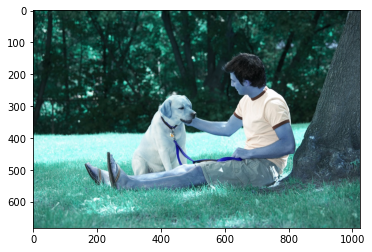

In [10]:
# Show the image
plt.imshow(img)

In [11]:
# Using the model to detect classes from the index of our labels
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.6)

In [12]:
print(ClassIndex)

[[ 1]
 [18]
 [ 1]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(
    ClassIndex.flatten(), confidence.flatten(), bbox
):  ##Flatten the array
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(
        img,
        classLabels[ClassInd - 1],
        (boxes[0] + 10, boxes[1] + 40),
        font,
        fontScale=font_scale,
        color=(0, 255, 0),
        thickness=3,
    )

In [14]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


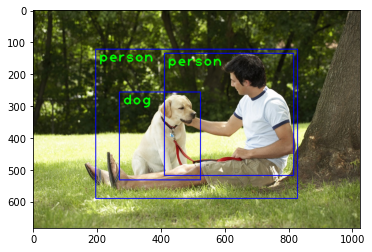

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Read a video

In [16]:
# Load the video
cap = cv2.VideoCapture('./assets/videos/pedestrian_crossing.mp4')

#Resize frame
fourcc = cv2.VideoWriter_fourcc(* 'XVID')
out = cv2.VideoWriter('output.mp4', fourcc, 5, (3840, 2160))

In [17]:
# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    # Resize frame
    if ret == True:
        resized_frame = cv2.resize(
            frame, (1280, 720), fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC
        )
        out.write(resized_frame)
    else:
        break

    ClassIndex, confidence, bbox = model.detect(resized_frame, confThreshold=0.55)

    ##print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(
            ClassIndex.flatten(), confidence.flatten(), bbox
        ):
            if ClassInd <= 80:
                cv2.rectangle(resized_frame, boxes, (255, 0, 0), 2)
                cv2.putText(
                    resized_frame,
                    classLabels[ClassInd - 1],
                    (boxes[0] + 10, boxes[1] + 40),
                    font,
                    fontScale=font_scale,
                    color=(0, 255, 0),
                    thickness=3,
                )

        cv2.imshow("Video", resized_frame)

        # Close video windoes if q is pressed
        if cv2.waitKey(2) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

# Read the webcam

In [1]:
# Load the video
cap = cv2.VideoCapture(0)


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)

    ##print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(
            ClassIndex.flatten(), confidence.flatten(), bbox
        ):
            if ClassInd <= 91:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                
                #label, con = (classLabels[ClassInd - 1], str(confidence * 100)) 
                
                cv2.putText(
                    frame,
                    #label + ": " + con,
                    classLabels[ClassInd - 1],
                    (boxes[0] + 10, boxes[1] + 40),
                    font,
                    fontScale=font_scale,
                    color=(0, 255, 0),
                    thickness=3,
                )

        cv2.imshow("Video", frame)

        # Close video windoes if q is pressed
        if cv2.waitKey(2) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined